In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os , glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern as LBP
from skimage.feature import hog ,sift ,ORB


In [2]:
def imshow(image , title = None):
    plt.imshow(image , 'gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    

def showGridImage (images , labels , GSize = 5 , title = None):
    selectedIndex = np.random.choice(len(images), GSize*GSize , replace = False)
    fig , axes = plt.subplots(GSize , GSize, figsize = (10 , 10))
    for i , ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [3]:
mainPath = "./15Dec23/Image Classification/"
classes = os.listdir(mainPath)

lbpFeatures = []
labels = []

for cls in classes:
    folderPath = os.path.join(mainPath,cls)
    for imgname in os.listdir(folderPath):
        imagePath = os.path.join(folderPath , imgname) 
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img , (100,100))
        feature = LBP(img,3,1)  # 3 means the size of windows , 1 matching or comparison with centre value
#         lbpFeatures.append(feature)
        lbpFeatures.append(feature.flatten())
#         label.append(label)
        labels.append(classes.index(cls))


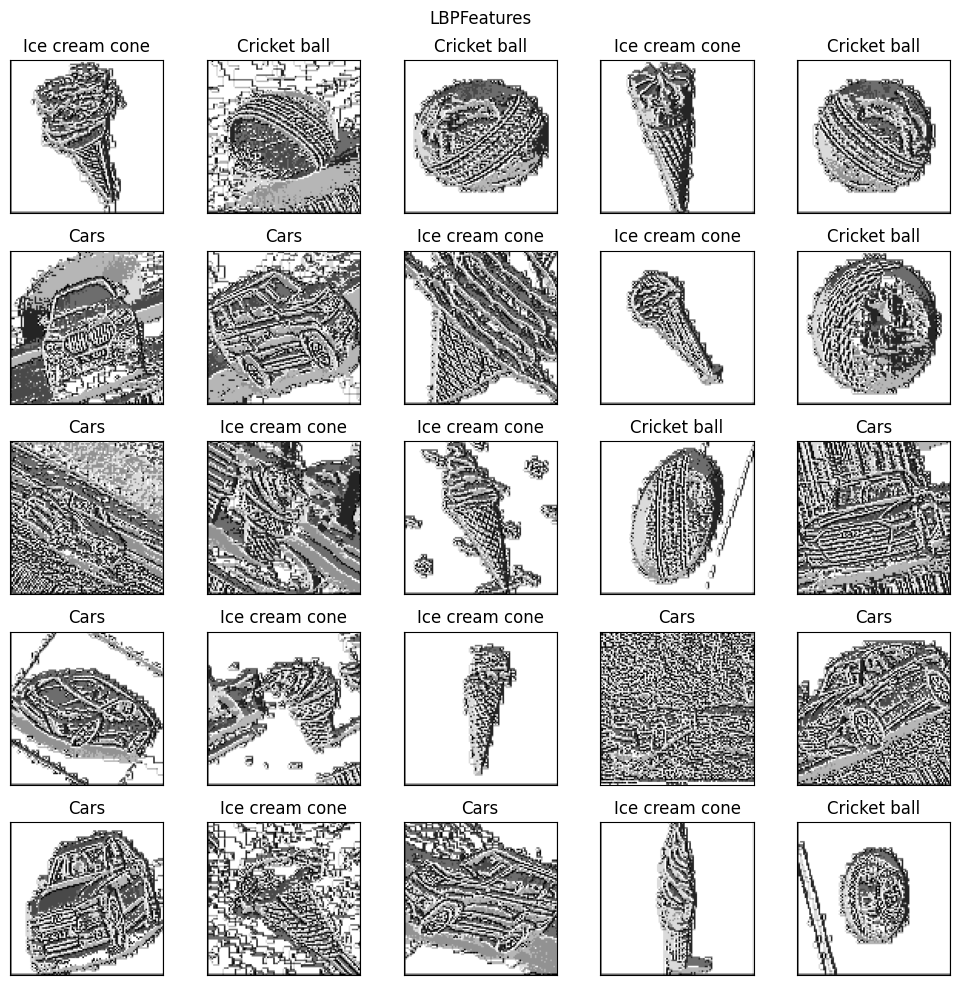

In [4]:
showGridImage(lbpFeatures, labels , 5 ,"LBPFeatures")

In [5]:
lbpFeatures = np.array(lbpFeatures)
label = np.array(labels)


In [6]:
trainImages, testImages, trainLabels, testLabels = train_test_split(lbpFeatures, labels, test_size=0.2, random_state=0)

In [7]:
model = LogisticRegression()
model.fit(trainImages, trainLabels)

E:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
preds = model.predict(testImages)

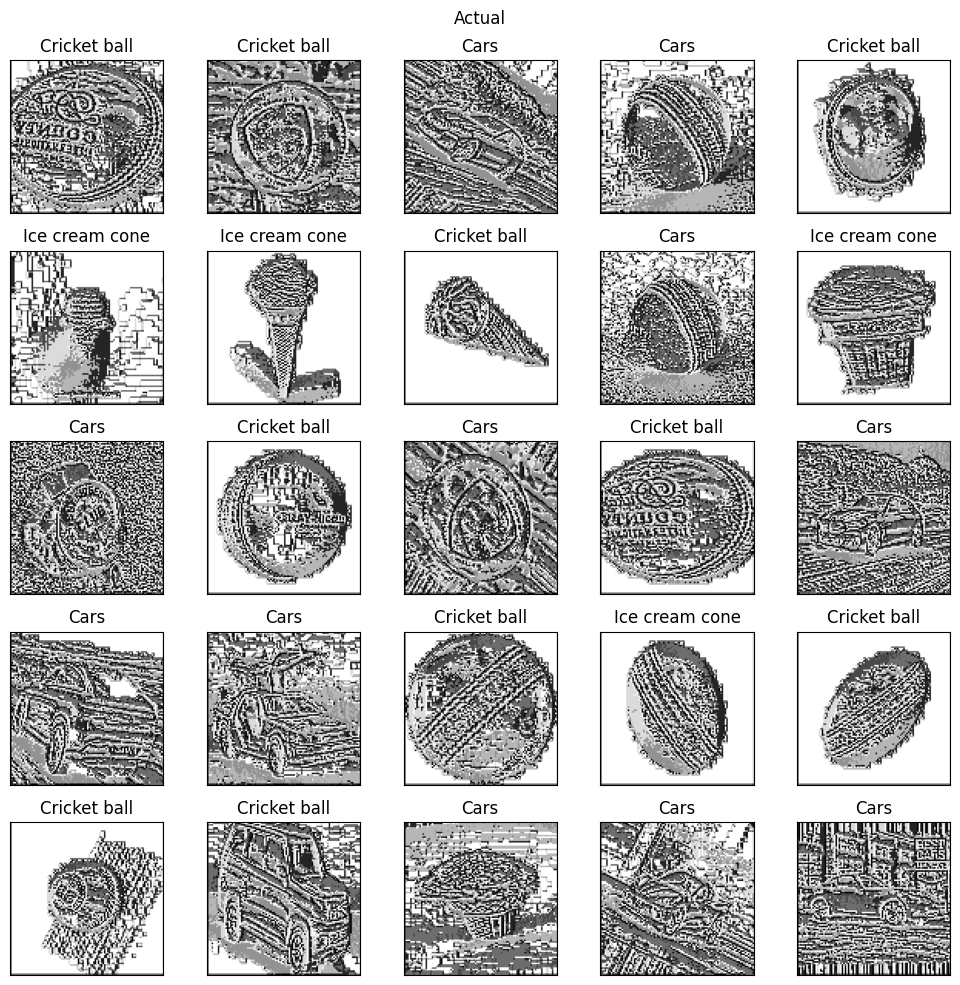

In [9]:
showGridImage(testImages, preds, 5,'Actual')

In [10]:
accuracy_score(testLabels, preds)

0.7575757575757576

In [11]:
import pickle
with open("Local_binary_pattern.pkl", 'wb') as file:
    pickle.dump(model,file)

In [12]:
# for hog featuring 

classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for cls in classes:
    folderPath = os.path.join(mainPath, cls)
    for imgName in os.listdir(folderPath):
        imagePath = os.path.join(folderPath, imgName)
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img, (100,100))
        feat, hogImage = hog(img, visualize=True)
        hogFeatures.append(feat.flatten())
        labels.append(classes.index(cls))
        hogImages.append(hogImage)
        

In [13]:
hogFeatures = np.array(hogFeatures)
labels = np.array(labels)

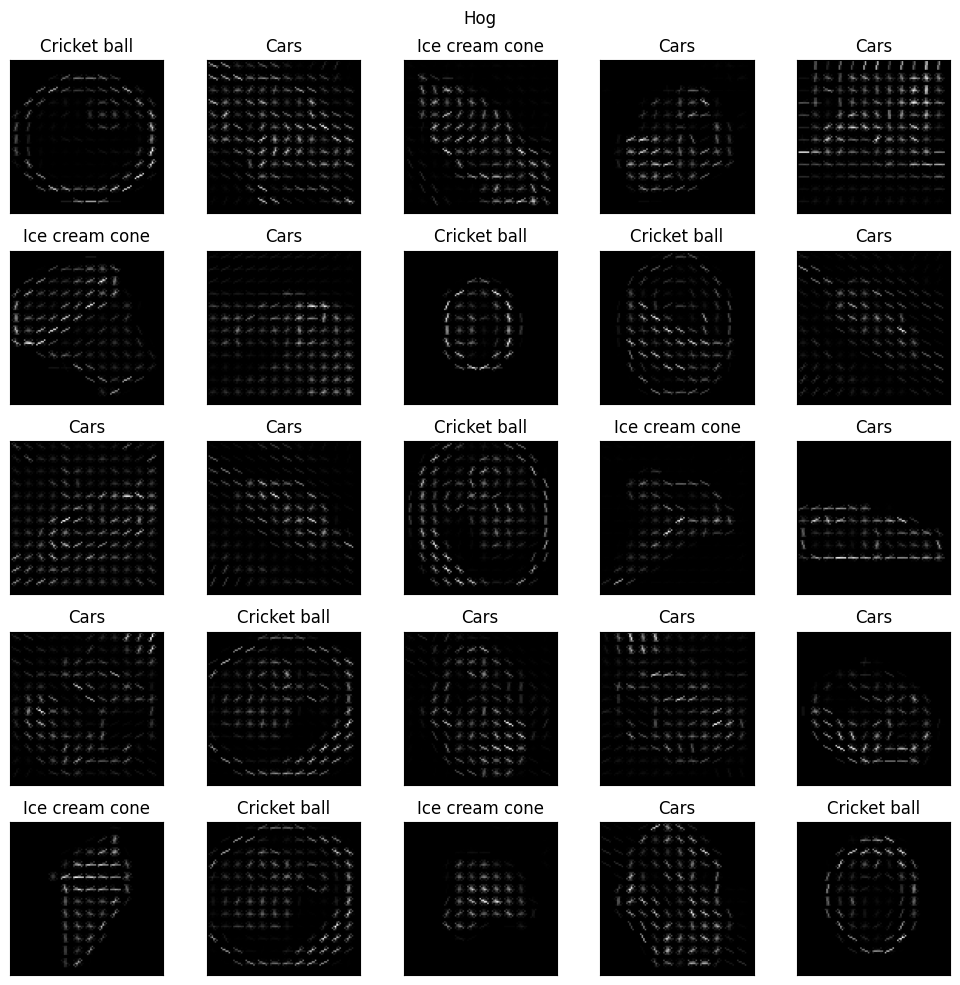

In [14]:
showGridImage(hogImages, labels,5 ,"Hog")

In [15]:
hogFeatsTrain, hogFeatsTest, trainlabels, testLabels = train_test_split(hogFeatures, labels, test_size=0.2, random_state=0)
hogImagesTrain, hogImagesTest,_,_ = train_test_split(hogImages, labels, test_size=0.2, random_state=0)

In [16]:
model = LogisticRegression()
model.fit(hogFeatsTrain, trainlabels)

E:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
preds = model.predict(hogFeatsTest)

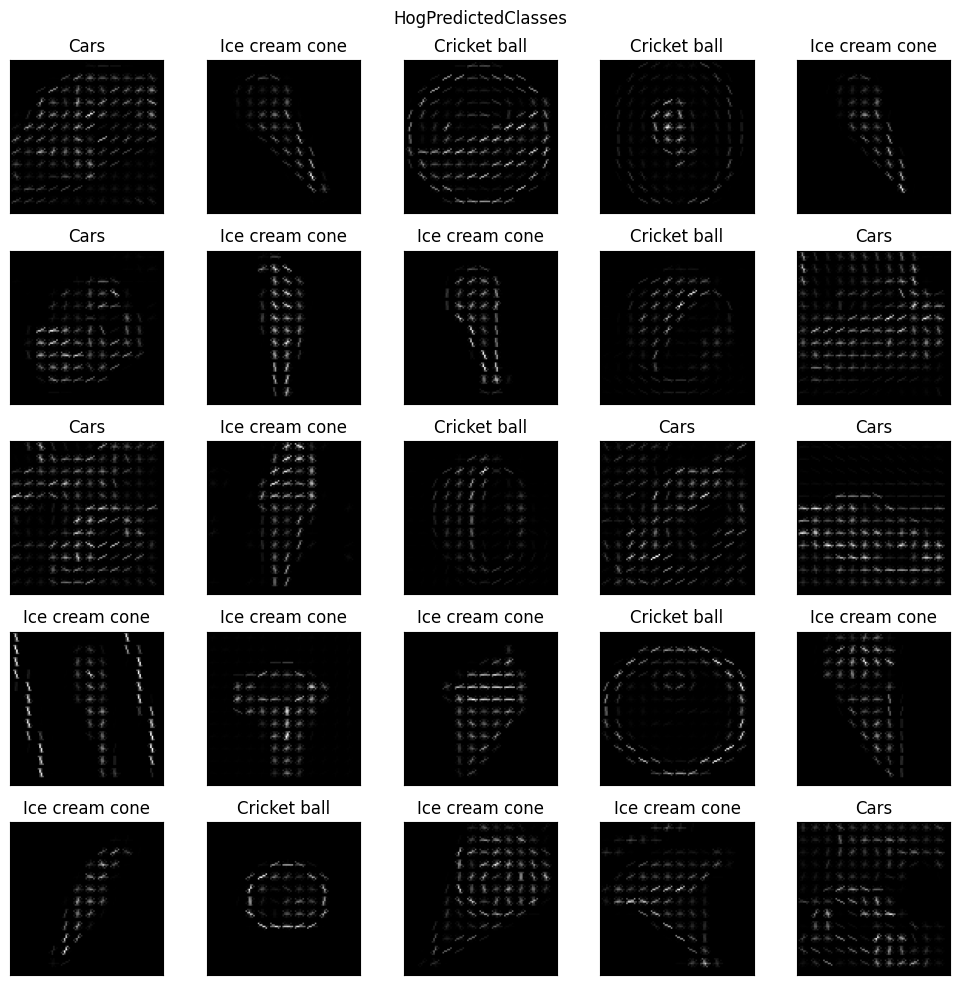

In [18]:
showGridImage(hogImagesTest, preds, 5, 'HogPredictedClasses')

In [19]:
accuracy_score(testLabels, preds)

0.9696969696969697

In [20]:
import pickle

In [21]:
with open("HOG.pkl", "wb") as new:
    pickle.dump(model,new)

In [22]:
# for sift featuring 

classes = os.listdir(mainPath)
ORBFeatures = []
labels = []
for cls in classes:
    folderPath = os.path.join(mainPath, cls)
    for imgName in os.listdir(folderPath):
        imagePath = os.path.join(folderPath, imgName)
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img, (100,100))
        feat = ORB(img,)
        ORBFeatures.append(feat.flatten())
        labels.append(classes.index(cls))
        

AttributeError: 'ORB' object has no attribute 'flatten'

In [ ]:
ORBFeatures = np.array(ORBFeatures)
labels = np.array(labels)

In [ ]:
trainimages , testimages , trainlabels , testlabels = train_test_split(ORBFeatures, labels, test_size=0.2 , random_state=0)

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(trainImages, trainlabels)

In [ ]:
predsORB = LR.predict(testimages)

In [ ]:
accuracy_score(testlabels, predsORB)

In [ ]:
showGridImage(ORBFeatures , labels , 5 , 'ORB')

In [ ]:
showGridImage(testIma , labels , 5 , 'ORB')

In [ ]:
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm, annot=True, xticklabels=['A_Car', 'A_C_Ball', 'A_Cone'], yticklabels=['P_Car', 'p_C_Ball', 'p_Cone'])

In [ ]:
singleImage = hogFeatsTest[0]

In [ ]:
p = model.predict([singleImage])

In [ ]:
classes[p[0]]

In [ ]:
# st.file_uploader('choose file ', type = ['jpg' ,'png' , 'jpeg', 'tiff']) for reading an image 